In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/s5_assignment_ERA

/content/drive/MyDrive/s5_assignment_ERA


In [4]:
!ls

model.py  __pycache__  utils.py


In [5]:
#mkdir s5_assignment_ERA

In [6]:
#cd s5_assignment_ERA

In [7]:
ls

model.py  __pycache__/  utils.py


In [8]:
import utils as utils

In [9]:
device = utils.use_device()
device

device(type='cuda')

In [10]:
dir(utils)

['F',
 'GetCorrectPredCount',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'data_loader',
 'datasets',
 'make_data',
 'nn',
 'plot_data',
 'plt',
 'test',
 'test_acc',
 'test_incorrect_pred',
 'test_losses',
 'test_transforms',
 'torch',
 'tqdm',
 'train',
 'train_acc',
 'train_losses',
 'train_transforms',
 'transforms',
 'use_device']

In [11]:
train_data,test_data = utils.make_data()

In [12]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
train_loader,test_loader = utils.data_loader(**kwargs)

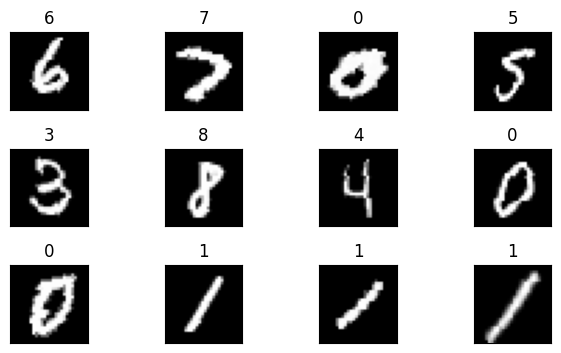

In [13]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

utils.plot_data(batch_data, batch_label,n_images=12)

In [14]:
len(train_loader)

118

In [11]:
import model as model

In [12]:
dir(model)

['F',
 'Net',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'nn',
 'torch']

In [13]:
import torch.optim as optim
model = model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc,train_losses = utils.train(model, device, train_loader, optimizer)
  test_acc,test_losses = utils.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.9989 Batch_id=117 Accuracy=33.27: 100%|██████████| 118/118 [00:32<00:00,  3.63it/s]


Test set: Average loss: 1.0332, Accuracy: 6641/10000 (66.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1795 Batch_id=117 Accuracy=87.98: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.1339, Accuracy: 9584/10000 (95.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0749 Batch_id=117 Accuracy=95.34: 100%|██████████| 118/118 [00:22<00:00,  5.15it/s]


Test set: Average loss: 0.0776, Accuracy: 9763/10000 (97.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0808 Batch_id=117 Accuracy=96.66: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0591, Accuracy: 9810/10000 (98.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0930 Batch_id=117 Accuracy=97.23: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0484, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1104 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0433, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0280 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0356, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0427 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0364, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0295 Batch_id=117 Accuracy=98.16: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]


Test set: Average loss: 0.0390, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0150 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0402, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0444 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:21<00:00,  5.44it/s]


Test set: Average loss: 0.0386, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1004 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:23<00:00,  5.03it/s]


Test set: Average loss: 0.0335, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0146 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0291, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0588 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0278, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0353 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0247, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0261 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0219, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0767 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0218, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0152 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:23<00:00,  5.02it/s]


Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0627 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0210, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0169 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0209, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

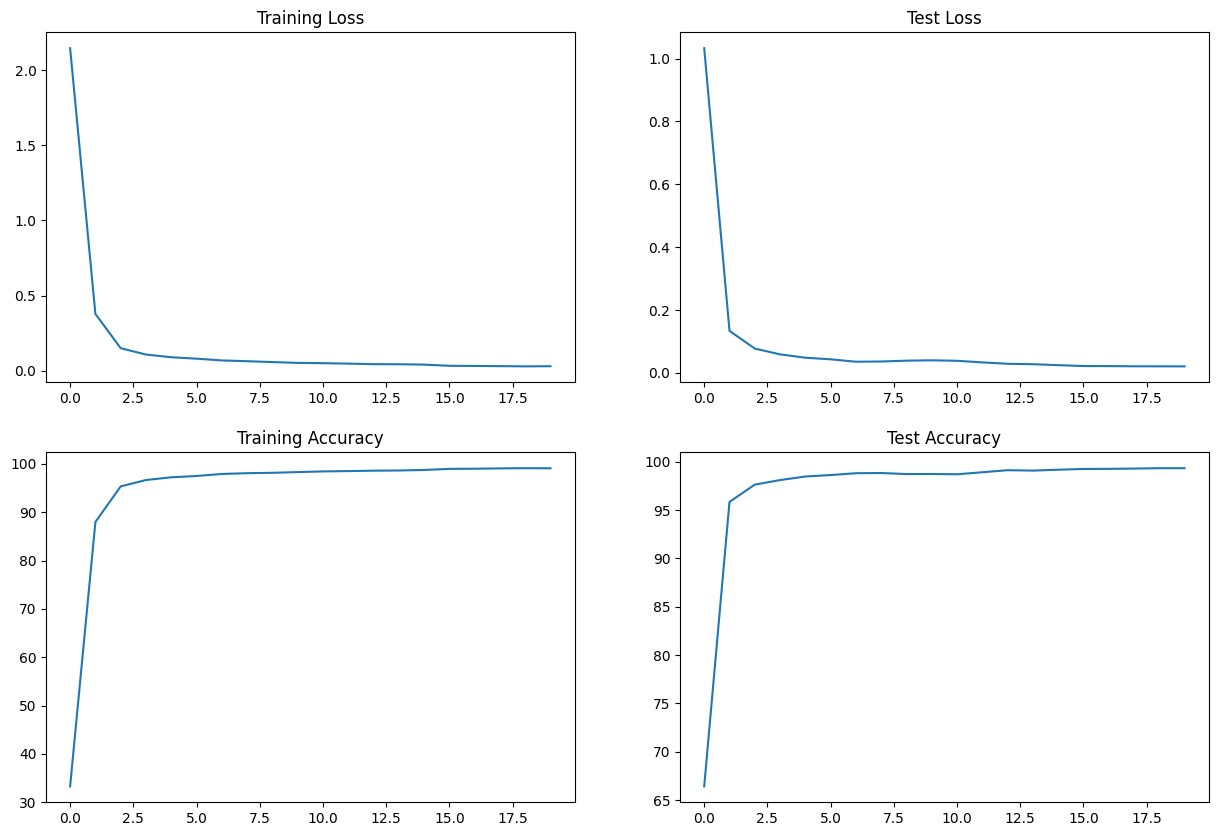

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [16]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
